<a href="https://colab.research.google.com/github/Uluc/data_science_and_analytics/blob/main/tfidfvectorizer_w_pipeline_gridsearcg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score, f1_score 

In [7]:
categories = [
    'comp.graphics',
    'sci.space',
]
dataset = fetch_20newsgroups(subset='train', categories=categories)
dir(dataset)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [ ]:
type(dataset.data[0])

In [ ]:
print(dataset.data[1])

In [8]:
print(dataset.target[:10])

[0 1 0 1 1 0 0 1 0 0]


In [10]:
docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.25, random_state=123)

Preprocessing
---
We use TfidfVectorizer from sklearn.feature_extraction.text to convert each of the documents in docs_train into a Bag-of-Words vector (with idf modification). The docs_train collection will be a matrix. 

Bag-of-Words Representation
---
- Assign a fixed integer id to each word occurring in any document of the training set (for instance by building a dictionary from words to integer indices).
- For each document #i, count the number of occurrences of each word w and store it in X[i, j] as the value of attribute/feature #j where j is the index of word w in the dictionary.

The bags of words representation implies that # of attributes is the number of distinct words in the corpus: this number is typically very large.

To deal with the problem that longer documents have higher average count values than shorter documents, we divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf (*Term Frequencies*).

We also downscale weights for words that occur in many documents in the dataset/corpus and are therefore less informative than those that occur only in a smaller portion of the dataset/corpus. The result is tf-idf (*Term Frequency times Inverse Document Frequency*)

In [11]:
vect = TfidfVectorizer(min_df=3, max_df=0.95)
dm = vect.fit_transform(docs_train)
dm.shape

(882, 6510)

In [ ]:
help(TfidfVectorizer)

112


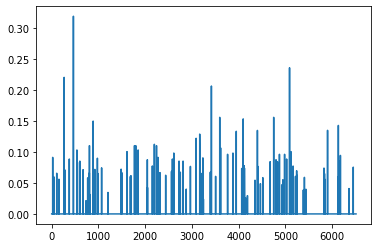

In [15]:
def to_numpy(v):
    return np.array(v.todense())[0]

d1 = to_numpy(dm[0])
plot(d1)
print(len(np.nonzero(d1)[0]))

Task 1 
---
Build a pipeline that inlcude a TfidfVectorizer and a SVC classifier (use kernel='linear'). Train the model and use it to make predictions on the test data. Calculate the accuracy score of the model on the test data. 

In [16]:
tfidf = TfidfVectorizer(min_df=3, max_df=0.95)
svc = SVC(kernel='linear')
m = Pipeline([('vect', tfidf), ('svc', svc)])

In [17]:
m.fit(docs_train, y_train)
y_predicted = m.predict(docs_test)
print(accuracy_score(y_test, y_predicted))

0.9864406779661017


Task 2
---
Using GridSearchCV, do a search to find the best values for: 
 - parameter 'ngram_range' of the TfidfVectorizer, try (1, 1) and (1, 2) 
 - parameter 'C' of SVC, try 1000 and 10000 
 
Print the best hyper parameter values. 

In [18]:
m = Pipeline([('vect', tfidf), ('svc', svc)])
params = {'svc__C':[1000, 10000], 'vect__ngram_range':[(1, 1), (1, 2)]}

cv = GridSearchCV(m, params, cv=5)

cv.fit(docs_train, y_train)


print(cv.best_params_)


{'svc__C': 1000, 'vect__ngram_range': (1, 2)}


Use the best model found by the grid search to make predictions on the test data. Print the accuracy score.

In [19]:

best_model = cv.best_estimator_.predict(docs_test)
print(accuracy_score(y_test, best_model))

0.9898305084745763


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, best_model, target_names=dataset.target_names))

               precision    recall  f1-score   support

comp.graphics       0.98      1.00      0.99       134
    sci.space       1.00      0.98      0.99       161

     accuracy                           0.99       295
    macro avg       0.99      0.99      0.99       295
 weighted avg       0.99      0.99      0.99       295

